# Explore the Data

In [94]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt
import seaborn as sns

## Setup the dataframe

In [95]:
df_data = pd.read_csv("MammalsDataSet/MammalsDataset2020.csv", header=None)

with open("MammalsDataSet/AnimalNames.txt") as f:
    animal_names = f.readlines()
    
animal_names = [a.strip() for a in animal_names]

with open("MammalsDataSet/PropertyNames.csv") as f:
    property_names = f.read()
    
property_names = property_names.split("\n")[:-1]


df_data = df_data.rename(index=dict(enumerate(animal_names)), columns=dict(enumerate(property_names)))
df_data = df_data/100

In [96]:
df_data

,black,white,blue,brown,gray,orange,red,yellow,patches,spots,...,plains,forest,fields,jungle,mountains,ocean,ground,water,tree,cave
antelope,0.0000,0.0000,0.0000,0.0000,0.1234,0.0000,0.0000,0.0000,0.1611,0.0919,...,0.5479,0.0494,0.4097,0.0000,0.2232,0.0000,0.5714,0.0000,0.0000,0.0123
grizzly bear,0.3925,0.0139,0.0000,0.7414,0.0375,0.0000,0.0000,0.0000,0.0125,0.0000,...,0.0000,0.7740,0.1000,0.0250,0.4385,0.0000,0.4777,0.0764,0.0979,0.5314
killer whale,0.8340,0.6479,0.0000,0.0000,0.0125,0.0000,0.0000,0.0000,0.6849,0.3269,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.8828,0.0000,0.7949,0.0000,0.0000
beaver,0.1938,0.0000,0.0000,0.8781,0.0750,0.0000,0.0000,0.0000,0.0000,0.0750,...,0.0000,0.1906,0.1562,0.0000,0.0000,0.0000,0.3125,0.6562,0.0000,0.0000
dalmatian,0.6958,0.7333,0.0000,0.0639,0.0000,0.0000,0.0000,0.0000,0.3708,1.0000,...,0.0000,0.0000,0.0125,0.0000,0.0000,0.0000,0.4139,0.0125,0.0625,0.0000
persian cat,0.1938,0.5009,0.2944,0.0898,0.3819,0.0000,0.0000,0.0000,0.1793,0.0625,...,0.1055,0.0898,0.0977,0.0625,0.0625,0.0000,0.4750,0.0125,0.0264,0.0000
horse,0.4490,0.4291,0.0444,0.6941,0.3594,0.0000,0.0000,0.0000,0.2229,0.1580,...,0.5254,0.1076,0.7014,0.0333,0.1622,0.0000,0.5652,0.0222,0.0000,0.0000
german shepherd,0.4354,0.1588,0.0500,0.5416,0.2682,0.0312,0.0250,0.0038,0.4878,0.1159,...,0.2133,0.1789,0.1250,0.0000,0.1125,0.0000,0.7261,0.0375,0.0000,0.0250
blue whale,0.1292,0.0438,0.6708,0.0750,0.2560,0.0000,0.0000,0.0000,0.1531,0.2375,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.7411,0.0000,0.7661,0.0000,0.0000
siamese cat,0.5621,0.2351,0.1222,0.3269,0.3813,0.0000,0.0000,0.0000,0.3583,0.0694,...,0.0778,0.0444,0.1000,0.0222,0.0556,0.0000,0.6042,0.0222,0.1000,0.0111


In [97]:
feature_array = df_data.to_numpy()
animal_array = np.diag(np.ones((50)))
data_array = np.concatenate((animal_array, feature_array), axis=1)
data_array_torch = torch.tensor(data_array)

In [98]:
data_array_torch

tensor([[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0123],
        [0.0000, 1.0000, 0.0000,  ..., 0.0764, 0.0979, 0.5314],
        [0.0000, 0.0000, 1.0000,  ..., 0.7949, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0208, 0.3341, 0.0727],
        [0.0000, 0.0000, 0.0000,  ..., 0.0055, 0.0000, 0.0032],
        [0.0000, 0.0000, 0.0000,  ..., 0.7140, 0.0000, 0.0000]],
       dtype=torch.float64)

## Design Neural Net

In [99]:
hidden_layer_size = 50

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Input layer linear
        self.input_weights = nn.Linear(135, hidden_layer_size).double()
        
        # Output layer linear
        self.output_weights = nn.Linear(hidden_layer_size, 135).double()
        
        
        
    def forward(self, x):
        
        input_projection = self.input_weights(x)
        hidden_units = torch.tanh(input_projection)
        
        output_projection = self.output_weights(hidden_units)
        output = torch.sigmoid(output_projection)
        
        return output

## Training

### Training Setup

In [100]:
epoch_number = 2000
epoch_size = 50

my_net = Net()
loss_function = nn.MSELoss()

optimizer = optim.Adam(my_net.parameters())

### Training loop

In [101]:
print_every = 100

loss_trajectory = []

for epoch in range(epoch_number):
    item_order = torch.randperm(epoch_size)
    
    item_loss_list = []
    for i in item_order:
        
        inp = data_array_torch[i,:]
        
        optimizer.zero_grad()
        output = my_net(inp)
        loss = loss_function(output, inp)
        
        item_loss_list.append(loss)
        
        loss.backward()
        optimizer.step()
        
    epoch_loss = torch.stack(item_loss_list).sum(0)
    loss_trajectory.append(epoch_loss)
        
    if epoch % print_every == 0:
        print("Epoch:", epoch)
        print("Loss:", epoch_loss)
        print()

Epoch: 0
Loss: tensor(6.3589, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 100
Loss: tensor(0.0664, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 200
Loss: tensor(0.0108, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 300
Loss: tensor(0.0068, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 400
Loss: tensor(0.0035, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 500
Loss: tensor(0.0043, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 600
Loss: tensor(0.0027, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 700
Loss: tensor(0.0028, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 800
Loss: tensor(0.0028, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 900
Loss: tensor(0.0027, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 1000
Loss: tensor(0.0033, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 1100
Loss: tensor(0.0021, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 1200
Loss: tensor(0.0038, dtype=torch.float64, grad_fn=<S

### Loss Graph

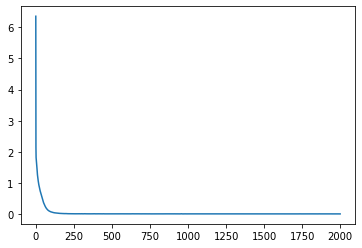

In [111]:
start_point = 0
plt.plot(range(start_point,epoch_number), torch.stack(loss_trajectory).detach().numpy()[start_point:])